In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

 1. Adata exploration and preprocessing notebook or report that analyzes the dataset,
 handles missing values, and prepares the data for modeling

In [2]:
df = pd.read_csv('customer_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Fix TotalCharges and monthly charges column 
col_float_numeric = ['MonthlyCharges' , 'TotalCharges']
for col in col_float_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

In [4]:
df.drop('customerID', axis=1, inplace=True)

In [5]:
# Label encoding binary features columns
label_enc_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                  'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

# Label encoding ordinary features columns with LabelEncoder class
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df[multi_cat_cols] = df[multi_cat_cols].apply(lambda col: le.fit_transform(col))

# Final dataset check
print(df.head())
print(df.info())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

2. Amachinelearning model capable of predicting customer churn
3.  An evaluation of model performance using appropriate metrics (such as accuracy,
 precision, recall, F1 score, etc.)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [8]:
x = df.drop('Churn', axis=1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Logistic Regression Evaluation:
 Confusion Matrix
[[934 102]
 [157 216]]


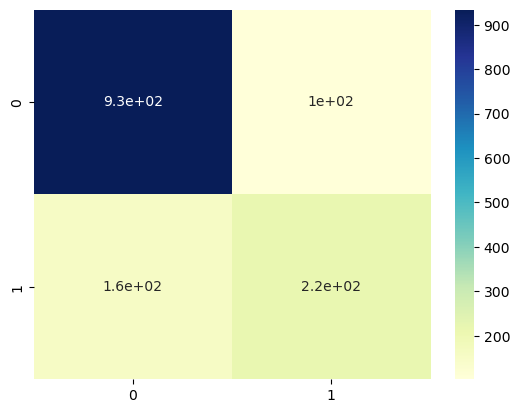

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
pred1 = lr.predict(x_test)

print("Logistic Regression Evaluation:")
sns.heatmap(confusion_matrix(y_test,pred1) , annot=True , cmap='YlGnBu')
print(f" Confusion Matrix\n{confusion_matrix(y_test,pred1)}")
plt.show()
print(classification_report(y_test, pred1))

In [19]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train, y_train)
pred2 = dt.predict(x_test)

print("Decision Tree Evaluation:")
print(f" Confusion Matrix\n{confusion_matrix(y_test, pred2)}")
print(classification_report(y_test, pred2))

Decision Tree Evaluation:
 Confusion Matrix
[[881 155]
 [135 238]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1036
           1       0.61      0.64      0.62       373

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.80      1409



In [21]:
scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train1, y_train)
pred3 = knn.predict(x_test1)

print("KNN Evaluation:")
print (f" Confusion Matrix\n{confusion_matrix(y_test, pred3)}")
print(classification_report(y_test, pred3))

KNN Evaluation:
 Confusion Matrix
[[880 156]
 [185 188]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.55      0.50      0.52       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.75      1409



4. Final video clip of candidate summarizing the entire process of the project as the
 presentation

In [ ]:
# https://drive.google.com/file/d/1F1oJ9dUzvU8DqWeZhLHQQCNgLt2UW1XV/view?usp=drivesdk